In [1]:
# Importing the libraries

# Numerical arrays.
import numpy as np

# Data frames.
import pandas as pd

# Plotting.
import matplotlib.pyplot as plt

# Logistic regression.
import sklearn.linear_model as lm

# K nearest neighbours.
import sklearn.neighbors as nei

# Helper functions.
import sklearn.model_selection as mod

# Fancier, statistical plots.
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline  
sns.set(color_codes=True) 


from sklearn.preprocessing import StandardScaler, normalize
from sklearn.cluster import KMeans

from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error
from math import sqrt

import sklearn.datasets as datasets
import sklearn.preprocessing as preprocessing
import sklearn.model_selection as model_selection
import sklearn.metrics as metrics
import sklearn.linear_model as linear_model
from sklearn.metrics import mean_squared_error
from sklearn.metrics import max_error


from sklearn.model_selection import train_test_split
from sklearn.base import BaseEstimator, TransformerMixin

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

# Packages needed for regression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import r2_score

from sklearn.model_selection import KFold

from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor

# import statistic library
from scipy import stats
import statsmodels.api as sm
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')


In [2]:
Irish_prices_df = pd.read_csv("Datasets/Irish_df.csv")

Irish_prices_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93 entries, 0 to 92
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Unnamed: 0       93 non-null     int64 
 1   Begin Date       93 non-null     object
 2   Month            93 non-null     int64 
 3   Year             93 non-null     int64 
 4   Price (�/100kg)  93 non-null     int64 
dtypes: int64(4), object(1)
memory usage: 3.8+ KB


In [3]:
Irish_prices_df.rename(columns = {'Price (�/100kg)':'Price'}, inplace = True)

In [4]:
Irish_prices_df

,Unnamed: 0,Begin Date,Month,Year,Price
0,0,2014-12-31,12,2014,283
1,1,2015-01-31,1,2015,1132
2,2,2015-02-28,2,2015,1132
3,3,2015-03-31,3,2015,1525
4,4,2015-04-30,4,2015,1242
...,...,...,...,...,...
88,88,2022-04-30,4,2022,2498
89,90,2022-06-30,6,2022,2884
90,91,2022-07-31,7,2022,2932
91,93,2022-09-30,9,2022,2954


ref:#https://sparkbyexamples.com/pandas/how-to-split-pandas-dataframe/

#grouped = Irish_prices_df.groupby(Irish_prices_df.Year)
#IrishButterPrices2022 = grouped.get_group(2022)
#print(IrishButterPrices2022)

##### **Test and Train Split**

Split the data into training and test sets in Python using scikit-learn’s built-in train_test_split():

The test_size refers to the number of observations that you want to put in the training data and the test data. If you specify a test_size of 0.2, your test_size will be 20 percent of the original data, therefore leaving the other 80 percent as training data.

The random_state is a parameter that allows you to obtain the same results every time the code is run. train_test_split() makes a random split in the data, which is problematic for reproducing the results. Therefore, it’s common to use random_state.

In [5]:
#creating 2 objects that now contain data :x and y . 

X =Irish_prices_df.drop(columns =['Unnamed: 0',"Begin Date",'Month','Price'])
y = Irish_prices_df['Price']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.4, random_state=0)

In [6]:
#fit a model
lm = linear_model.LinearRegression()
model = lm.fit(X_train, y_train)
predictions = lm.predict(X_test)

In [7]:
predictions[0:5]

array([1363.76819127, 1599.56652807, 1835.36486486, 1481.66735967,
       1481.66735967])

Text(0, 0.5, 'Predictions')

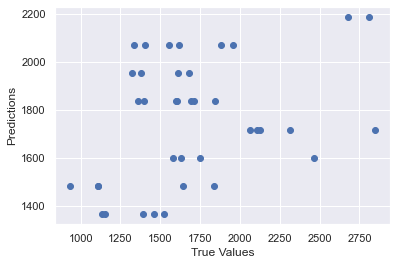

In [8]:
## The line / model
plt.scatter(y_test, predictions)
plt.xlabel('True Values')
plt.ylabel('Predictions')

In [9]:
model.score(X_test, y_test)

0.07660308656332027

In [10]:
 #Print the shape of training and testing data along with its labels.

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((55, 1), (38, 1), (55,), (38,))

In [11]:
X.dtypes

Year    int64
dtype: object

In [12]:
y.dtypes

dtype('int64')

## Scaling of the data : Normalisation

This is a crucial part of data preprocessing stage . Here we use standardization instead of normalization as we know that the data follows a gaussian distribution. Linear regression (gradient based Algorithm) require data to be scaled and KNN is a distance based algorithm is most affected by the range of features therefore needs the data to be scaled prior to fitting the model

In [13]:
#from sklearn.preprocessing import MinMaxScaler
#sc=MinMaxScaler(feature_range=(0, 1))
#X_train=sc.fit_transform(X_train)
#X_test=sc.transform(X_test)

#### **5.3 SciKit-Learn Algorithm - Linear Regression ( Supervised)**

SciKit-Learn Algorithm - Linear Regression [23][24] An example of an supervised Algorithm : use for Classification and Regression

Classification - learn how to classify any new observation - target variable is categorical - using accuracy , precision and recall to measure precision of the model algorithm .

Regression - prediction made on numerous independent variables vs target variable is ladder score using Coefficients of determination , RMSE and MSE to measure the precision of the model algorithm. It identifies the equation that produces the smallest difference between all the observed values and their fitted values otherwise called residuals

The five basic steps :

Import the packages and classes you need. Provide data to work with and eventually do appropriate transformations. Create a regression model and fit it with existing data. Check the results of model fitting to know whether the model is satisfactory. Apply the model for predictions.

In [14]:
import sklearn as sk
import sklearn.linear_model as lm
import sklearn.neighbors as nei
import sklearn.model_selection as mod

# models  and classifiers for Supervised Learning
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LinearRegression
# libraries for the confusion matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# create tables
from tabulate import tabulate

In [15]:
# creating a variable lm as the instance of LinearRegression and then fitting a linear model to it 
# using the data from the earlier data processing into train and test sets

lm = linear_model.LinearRegression()
lm.fit(X_train, y_train)

LinearRegression()

Determining the R2 for each of the variables in order to determine which variable carries the most weight[25]¶

In [16]:
print('Coefficients:\n Price \n',lm.coef_)
print('Intercept:',lm.intercept_)

Coefficients:
 Price 
 [117.8991684]
Intercept: -236203.0561330561


In [17]:
y_train_pred = lm.predict(X_train)
y_test_pred = lm.predict(X_test)

In [18]:
# check the prediction data & real data for the 10 data entries
print('Real Data')
print(y_test[:10])
print('\n Predicted Data')
print(y_test_pred[:10])
print('\n Diff')
print(y_test[:10]-y_test_pred[:10])


Real Data
2     1132
30    1752
55    1846
16    1112
13    1112
51    1692
61    1380
45    2128
33    2464
77    1954
Name: Price, dtype: int64

 Predicted Data
[1363.76819127 1599.56652807 1835.36486486 1481.66735967 1481.66735967
 1835.36486486 1953.26403326 1717.46569647 1599.56652807 2071.16320166]

 Diff
2    -231.768191
30    152.433472
55     10.635135
16   -369.667360
13   -369.667360
51   -143.364865
61   -573.264033
45    410.534304
33    864.433472
77   -117.163202
Name: Price, dtype: float64


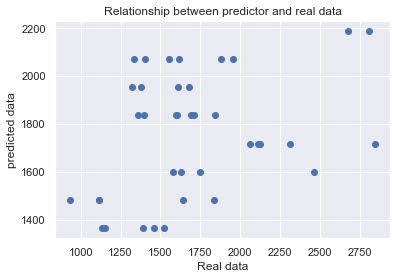

In [19]:
#Visualisation of linearity
plt.scatter(y_test,y_test_pred)
plt.xlabel('Real data')
plt.ylabel('predicted data')
plt.title('Relationship between predictor and real data')
plt.show()

Text(0.5, 1.0, 'Residuals')

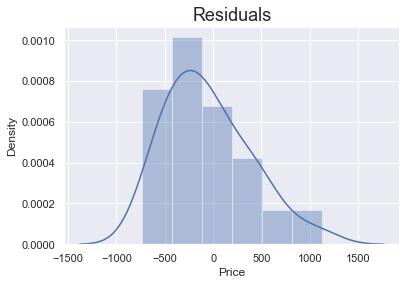

In [20]:
# check distribution from residual using visualisation via a distplot
sns.distplot(y_test - y_test_pred)
plt.title('Residuals', size=18)

In [21]:
# Check distribution from residual
residual = (y_test - y_test_pred)
sw = stats.shapiro(residual)
ks = stats.kstest(residual, 'norm')

print('Shapiro-Wilk test ---- statistic: {}, p-value: {}'.format(sw[0],sw[1]))

Shapiro-Wilk test ---- statistic: 0.9592693448066711, p-value: 0.1797098070383072


In [22]:
# Evaluate regression model - R squared

# This value shows how good the regression function is at fitting the data : the closet the value is to 1 , the better
print('R^2 score:',lm.score(X_train, y_train))

R^2 score: 0.20061588201176872


In [23]:
# Evaluate regression model - RMSE

### RMSE is the standard deviation of residual or prediction errors - measure of how far from the regression line the data points are. 

## The lower the RMSE the better the model is at making predictions. 
Linear_rmse_training = mean_squared_error(y_true=y_train,y_pred=y_train_pred,squared=False)
Linear_rmse_test = mean_squared_error(y_true=y_test,y_pred=y_test_pred,squared=False)

print('RMSE Training Data: {}'.format(Linear_rmse_training))
print('RMSE Test Data: {}'.format(Linear_rmse_test))

RMSE Training Data: 547.211418410867
RMSE Test Data: 438.62794544770736


In [24]:
# Compare performance between model
# Compare performance between model

list_model = [['Ridge',linear_model.Ridge()],['Lasso',linear_model.Lasso()],['BayessianRidge',linear_model.BayesianRidge()]]
performance_result = {}

for model_name,regression_model in list_model:
  regression_model.fit(X_train, y_train)
  y_train_pred = regression_model.predict(X_train)
  y_test_pred = regression_model.predict(X_test)

  rmse_training = mean_squared_error(y_true=y_train,y_pred=y_train_pred,squared=False)
  rmse_test = mean_squared_error(y_true=y_test,y_pred=y_test_pred,squared=False)

  r_score = regression_model.score(X_train, y_train)

  performance_result[model_name]={'training':rmse_training,'test':rmse_test,'R^2 score':r_score}

performance_result

{'Ridge': {'training': 547.2121898395741,
  'test': 438.45629866006954,
  'R^2 score': 0.2006136281542269},
 'Lasso': {'training': 547.2115874223384,
  'test': 438.5474079763956,
  'R^2 score': 0.20061538821685776},
 'BayessianRidge': {'training': 547.5851686994251,
  'test': 435.2142284570934,
  'R^2 score': 0.1995235361066341}}

In [25]:
from sklearn.linear_model import LinearRegression
model = LinearRegression().fit(X_train, y_train)
model.score(X_train, y_train)


0.20061588201176872

In [26]:
model.score(X_test, y_test)

0.07660308656332027

#ref https://towardsdatascience.com/train-test-split-and-cross-validation-in-python-80b61beca4b6

In [27]:
from sklearn.model_selection import KFold # import KFold
kf = KFold(n_splits=2) # Define the split - into 2 folds 
kf.get_n_splits(X) # returns the number of splitting iterations in the cross-validator
print(kf) 


KFold(n_splits=2, random_state=None, shuffle=False)


In [28]:
#for train_index, test_index in kf.split(X):
 #print('TRAIN:', train_index, 'TEST:', test_index)
 #X_train, X_test = X[train_index], X[test_index]
 #y_train, y_test = y[train_index], y[test_index]


In [29]:
#from sklearn.model_selection import LeaveOneOut 

#loo = LeaveOneOut()
#loo.get_n_splits(X)


#for train_index, test_index in loo.split(X):
   #print('TRAIN:', train_index,'TEST:', test_index)
  # X_train, X_test = X[train_index], X[test_index]
  # y_train, y_test = y[train_index], y[test_index]
  # print(X_train, X_test, y_train, y_test)

In [30]:
# Necessary imports: 
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn import metrics

In [31]:
#Irish_prices_dfa = Irish_prices_df.drop(columns =['Unnamed: 0','Begin Date','Month','Year','Price'])

In [32]:
#Irish_prices_dfa = Irish_prices_df.drop(columns =['Unnamed: 0','Begin Date','Month','Price'])

In [33]:
#Irish_prices_dfa.dtypes

In [34]:
y

0      283
1     1132
2     1132
3     1525
4     1242
      ... 
88    2498
89    2884
90    2932
91    2954
92    2678
Name: Price, Length: 93, dtype: int64

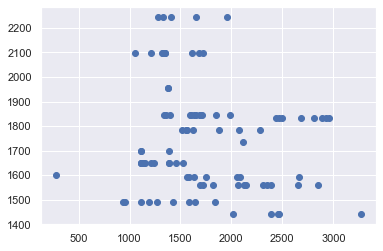

In [35]:
# Make cross validated predictions
predictions = cross_val_predict(model,X,y, cv=6)
plt.scatter(y, predictions)

In [36]:
accuracy = metrics.r2_score(y, predictions)
print (accuracy)


-0.2873990408260134


### 5.3 SciKit-Learn Algorithm - KNN for Classification ( Supervised)¶

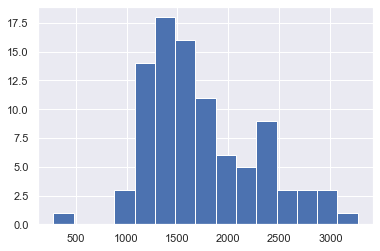

In [37]:
# To see what the happiness score ranges we expect , we visualise though a histogram, the range goes from below 3 up to 8
import matplotlib.pyplot as plt
Irish_prices_df["Price"].hist(bins=15)
plt.show()

Splitting Data Into Training and Test Sets for Model Evaluation : Under data processing section of this notebook Training data - used to fit the model. For KNN . the training data will be used as neighbours Test data - used to evaluate the model. For KNN , make predictions on the footfall for street in the test data and compare to real data Evaluation of the Model Fit The model needs to be evaluated : using RMSE ( root mean squared error) is a common way. Also looking at a range of K values between 1 and 20. As if you use one neighbour a prediction can strongly change from one point to another. perhaps an outlier. However if you look at multiple data points , this impact is lessened.

In [38]:
### Evaluation of the prediction error on the training data

rmse_val = [] #to store rmse values for different k
for K in range(20):
    K = K+1
    knn_model = KNeighborsRegressor(n_neighbors=K) # unfitted model created 
    knn_model.fit(X_train, y_train)
    train_preds = knn_model.predict(X_train)
    mse = mean_squared_error(y_train, train_preds)
    rmse = sqrt(mse)
    rmse_val.append(rmse) #store rmse values
    print('RMSE value for k= ' , K , 'is:', rmse)

RMSE value for k=  1 is: 490.39611076612897
RMSE value for k=  2 is: 323.7040314855532
RMSE value for k=  3 is: 310.57605649612924
RMSE value for k=  4 is: 321.52843257563626
RMSE value for k=  5 is: 312.39031529627977
RMSE value for k=  6 is: 305.8302848498054
RMSE value for k=  7 is: 310.4620609352267
RMSE value for k=  8 is: 313.46832838059936
RMSE value for k=  9 is: 331.53006103406074
RMSE value for k=  10 is: 343.7377470212906
RMSE value for k=  11 is: 372.22092980651365
RMSE value for k=  12 is: 392.62193708426173
RMSE value for k=  13 is: 411.913273407203
RMSE value for k=  14 is: 421.04335189431146
RMSE value for k=  15 is: 425.3157809620442
RMSE value for k=  16 is: 452.4861877129762
RMSE value for k=  17 is: 450.96487483960476
RMSE value for k=  18 is: 467.0263589751154
RMSE value for k=  19 is: 482.1302207242178
RMSE value for k=  20 is: 494.5609352565346


<AxesSubplot:>

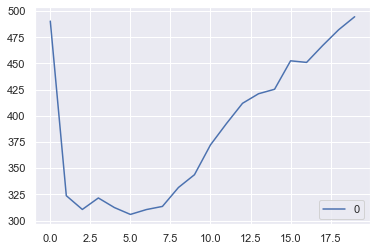

In [39]:
#plotting the rmse values against k values
curve = pd.DataFrame(rmse_val) #elbow curve 
curve.plot()

Visualisation of the Model Fit

Tune and Optimize kNN in Python Using scikit-learn
Can I improve the predictive score from the kNN Performances ?

From earlier calculations , we determined that the best K value was 3.

Another way to determine the best value for k is using GridSearchCV :

In [40]:
from sklearn.model_selection import GridSearchCV
parameters = {"n_neighbors": range(1, 20)}
gridsearch = GridSearchCV(KNeighborsRegressor(), parameters)
gridsearch.fit(X_train, y_train)
GridSearchCV(estimator=KNeighborsRegressor(),
             param_grid={'n_neighbors': range(1, 20),
                         'weights': ['uniform', 'distance']})

GridSearchCV(estimator=KNeighborsRegressor(),
             param_grid={'n_neighbors': range(1, 20),
                         'weights': ['uniform', 'distance']})

In [41]:
gridsearch.best_params_

{'n_neighbors': 3}

In [42]:
# Now we know what the best nearest neighbour is we can see how it affects the train and test analysis

train_preds_grid = gridsearch.predict(X_train)
kNNtrain_mse = mean_squared_error(y_train, train_preds_grid)
kNNtrain_rmse = sqrt(kNNtrain_mse)
kNNtrain_rmse

310.57605649612924

Adding Weighted Average of Neighbors Based on Distance Below, you’ll test whether the performance of your model will be any better when predicting using a weighted average instead of a regular average. This means that neighbors that are further away will less strongly influence the prediction.

You can do this by setting the weights hyperparameter to the value of "distance". However, setting this weighted average could have an impact on the optimal value of k. Therefore, you’ll again use GridSearchCV to tell you which type of averaging you should use:

In [43]:
parameters = { "n_neighbors": range(1, 20), "weights": ["uniform", "distance"]}
gridsearch = GridSearchCV(KNeighborsRegressor(), parameters)
gridsearch.fit(X_train, y_train)
gridsearch.best_params_
test_preds_grid = gridsearch.predict(X_test)
test_mse = mean_squared_error(y_test, test_preds_grid)
test_rmse = sqrt(test_mse)
test_rmse

313.137278868413

In [44]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)
print('Accuracy of K-NN classifier on training set: {:.2f}'.format(knn.score(X_train, y_train)))
print('Accuracy of K-NN classifier on test set: {:.2f}'.format(knn.score(X_test, y_test)))

Accuracy of K-NN classifier on training set: 0.16
Accuracy of K-NN classifier on test set: 0.08


Further Improving on kNN in scikit-learn With Bagging As a third step for kNN tuning, you can use bagging. Bagging is an ensemble method, or a method that takes a relatively straightforward machine learning model and fits a large number of those models with slight variations in each fit. Bagging often uses decision trees, but kNN works perfectly as well.

Ensemble methods are often more performant than single models. One model can be wrong from time to time, but the average of a hundred models should be wrong less often. The errors of different individual models are likely to average each other out, and the resulting prediction will be less variable.

You can use scikit-learn to apply bagging to your kNN regression using the following steps. First, create the KNeighborsRegressor with the best choices for k and weights that you got from GridSearchCV:

In [45]:
best_k = gridsearch.best_params_["n_neighbors"]
best_weights = gridsearch.best_params_["weights"]
bagged_knn = KNeighborsRegressor( n_neighbors=best_k, weights=best_weights)

In [46]:
from sklearn.ensemble import BaggingRegressor
bagging_model = BaggingRegressor(bagged_knn, n_estimators=100)

In [47]:
from sklearn.ensemble import BaggingRegressor
bagging_model = BaggingRegressor(bagged_knn, n_estimators=100).fit(X_train, y_train)
test_preds_grid = bagging_model.predict(X_test)
test_mse = mean_squared_error(y_test, test_preds_grid)
test_rmse = sqrt(test_mse)
test_rmse           

304.9197837551639

Predictive performance of the algorithm :

-Model RMSE :Prediction Error -Arbitrary 8187.810530606405 -GridsearchCV for k 7507.038069670647
-GridserchCV for k and weights 7569.441893962941 -Bagging and GridsearchCV 7528.039321851745

There isnt alot of differences in the errors achieved by tuning and optimizing kNN .

In [48]:
#Importing the auxiliar and preprocessing librarys 
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.pipeline import Pipeline

from sklearn.model_selection import train_test_split, KFold, cross_validate
from sklearn.metrics import accuracy_score
#Models
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.linear_model import RidgeClassifier, SGDClassifier, LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, ExtraTreesClassifier, BaggingClassifier, VotingClassifier, RandomTreesEmbedding

In [49]:
clfs = []
seed = 3

clfs.append(("LogReg", 
             Pipeline([("Scaler", StandardScaler()),
                       ("LogReg", LogisticRegression())])))

#clfs.append(("XGBClassifier",
            # Pipeline([("Scaler", StandardScaler()),
                       #("XGB", XGBClassifier())]))) 
clfs.append(("KNN", 
             Pipeline([("Scaler", StandardScaler()),
                       ("KNN", KNeighborsClassifier())]))) 

clfs.append(("DecisionTreeClassifier", 
             Pipeline([("Scaler", StandardScaler()),
                       ("DecisionTrees", DecisionTreeClassifier())]))) 

clfs.append(("RandomForestClassifier", 
             Pipeline([("Scaler", StandardScaler()),
                       ("RandomForest", RandomForestClassifier())]))) 

clfs.append(("GradientBoostingClassifier", 
             Pipeline([("Scaler", StandardScaler()),
                       ("GradientBoosting", GradientBoostingClassifier(max_features=15, n_estimators=150))]))) 

clfs.append(("RidgeClassifier", 
             Pipeline([("Scaler", StandardScaler()),
                       ("RidgeClassifier", RidgeClassifier())])))

clfs.append(("BaggingRidgeClassifier",
             Pipeline([("Scaler", StandardScaler()),
                       ("BaggingClassifier", BaggingClassifier())])))

clfs.append(("ExtraTreesClassifier",
             Pipeline([("Scaler", StandardScaler()),
                       ("ExtraTrees", ExtraTreesClassifier())])))

#'neg_mean_absolute_error', 'neg_mean_squared_error','r2'
scoring = 'accuracy'
n_folds = 7

results, names  = [], [] 

for name, model  in clfs:
    kfold = KFold(n_splits=n_folds, shuffle=True,random_state=seed)
    cv_results = cross_val_score(model, X_train, y_train, cv= 2, scoring=scoring, n_jobs=-1)*100    
    names.append(name)
    results.append(cv_results)    
    msg = "%s: %f (+/- %f)" % (name, cv_results.mean(),  cv_results.std())
    print(msg)
    
# boxplot algorithm comparison
#fig = plt.figure(figsize=(15,6))
#fig.suptitle('Classifier Algorithm Comparison', fontsize=22)
#ax = fig.add_subplot(111)
#sns.boxplot(x=names, y=results)
#ax.set_xticklabels(names)
#ax.set_xlabel("Algorithmn", fontsize=20)
#ax.set_ylabel("Accuracy of Models", fontsize=18)
#ax.set_xticklabels(ax.get_xticklabels(),rotation=45)
#plt.show()

LogReg: 7.275132 (+/- 0.132275)
KNN: 7.275132 (+/- 0.132275)
DecisionTreeClassifier: 7.275132 (+/- 0.132275)
RandomForestClassifier: 1.785714 (+/- 1.785714)
GradientBoostingClassifier: nan (+/- nan)
RidgeClassifier: 7.275132 (+/- 0.132275)
BaggingRidgeClassifier: 1.785714 (+/- 1.785714)
ExtraTreesClassifier: 7.275132 (+/- 0.132275)


*When modeling multiclass classification
problems using neural networks, it is good practice to reshape the output attribute from a
vector that contains values for each class value to be a matrix with a boolean for each class
value and whether or not a given instance has that class value or not. This is called one hot
encoding or creating dummy variables from a categorical variable.*¶

In [ ]:
ref# https://www.kaggle.com/code/girishkurup/machine-learning-on-agriculture-dataset-nn#Lets-Submit-the-solution-as-per-sample-submisssion

In [50]:
#!pip install tensorflow 

In [51]:
import tensorflow as tf
import tensorflow 

from tensorflow import keras
from keras.layers import Dense

ModuleNotFoundError: No module named 'tensorflow'

In [ ]:
from keras.utils import np_utils
dummy_y = np_utils.to_categorical(y)

In [ ]:
dummy_y

In [ ]:
X.shape
m=X.shape[1]
m

In [ ]:
X_train

In [52]:
from numpy import array
from keras.models import Sequential
from keras.layers import Dense
from matplotlib import pyplot
# prepare sequence
X = X_train
y = dummy_y
# create model
model = Sequential()
model.add(Dense(20, input_dim=14, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(3, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
# train model
NN = model.fit(X, y, epochs=30, batch_size=m, verbose=2)
# plot metrics
#pyplot.plot(NN.history['accuracy'])
#pyplot.show()

ModuleNotFoundError: No module named 'tensorflow'

In [ ]:
print(NN.history.keys())

In [ ]:
#history = model.fit(X, y, epochs=30, batch_size=m, verbose=2)
# plot metrics
pyplot.plot(NN.history['accuracy'])
#pyplot.plot(history.history['loss'])
pyplot.show()

### **Conclusion  : Review of machine learning algorithms reviewed**

In [ ]:
# display the results of the 3 Algorithms

algorithm_results = {'': ['Train results', 'Test results'],
        'KNN': [kNNtrain_rmse, kNNtest_rmse], 
        'Linear Regression': [Linear_rmse_training, Linear_rmse_test]}

print(tabulate(algorithm_results,headers='keys',tablefmt='fancy_grid'))